# DEMO

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.typing import NDArray
import pandas as pd
from scipy import stats

from randomgen.monte_carlo_rv import monte_carlo_rv

# Initial

## Generate One Exponential RV

In [ ]:
def exp_inverse_cdf(u: float or NDArray, l: float = 1):
    """
    :param u: uniform value to generate from
    :param l: lambda value of exponential distribution

    :return: exp(l) RV
    """
    return -1 / l * np.log(1 - u)


u = np.random.uniform()
print(u, exp_inverse_cdf(u, 2))

## Generate 100 RVs

In [ ]:
u = np.random.uniform(size=20)
print(u)
exps = exp_inverse_cdf(u, 1)
print(exps)

## Plot

In [ ]:
plt.figure()
plt.hist(exps)
plt.show()

## Statistics

In [ ]:
# stats.kstest(exps, exp_inverse_cdf)
print(pd.DataFrame(exps).describe())
print("90%     {:.6f}".format(np.quantile(exps, 0.9, axis=0)))
print("95%     {:.6f}".format(np.quantile(exps, 0.95, axis=0)))
print("99%     {:.6f}".format(np.quantile(exps, 0.99, axis=0)))
print(stats.kstest(exps, stats.expon.cdf))

In [ ]:
STATS = ['count', 'mean', 'std', 'min', '0.01', '0.05', '0.10', '0.25', '0.50', '0.75', '0.90', '0.95', '0.99', 'max', 'ks', 'ad']

cdf = {
    'alpha': stats.alpha.cdf,
    'anglit': stats.anglit.cdf,
    'arcsine': stats.arcsine.cdf,
    'argus': stats.argus.cdf,
    'beta': stats.beta.cdf,
    'betaprime': stats.betaprime.cdf,
    'bradford': stats.bradford.cdf,
    'burr': stats.burr.cdf,
    'burr12': stats.burr12.cdf,
    'cauchy': stats.cauchy.cdf,
    'chi': stats.chi.cdf,
    'chi2': stats.chi2.cdf,
    'cosine': stats.cosine.cdf,
    'crystalball': stats.crystalball.cdf,
    'dgamma': stats.dgamma.cdf,
    'dweibull': stats.dweibull.cdf,
    'erlang': stats.erlang.cdf,
    'expon': stats.expon.cdf,
    'exponential': stats.expon.cdf,
    'exponnorm': stats.exponnorm.cdf,
    'exponweib': stats.exponweib.cdf,
    'exponpow': stats.exponpow.cdf,
    'f': stats.f.cdf,
    'fatiguelife': stats.fatiguelife.cdf,
    'fisk': stats.fisk.cdf,
    'foldcauchy': stats.foldcauchy.cdf,
    'foldnorm': stats.foldnorm.cdf,
    'genlogistic': stats.genlogistic.cdf,
    'gennorm': stats.gennorm.cdf,
    'genpareto': stats.genpareto.cdf,
    'genexpon': stats.genexpon.cdf,
    'genextreme': stats.genextreme.cdf,
    'gausshyper': stats.gausshyper.cdf,
    'fatiguelife': stats.fatiguelife.cdf,
}

def _get_dist_cdf(dist: str):
    """
    """
    if dist == 'normal':
        pass


def _get_statistics(rvs: list, dist: str, statistics: list):
    """Calculate and print desired statistics.

    :param rvs
    """
    statistics_dict = {}
    if 'count' in statistics:
        statistics_dict['count'] = len(rvs)
        # print('count:\t\t{:.6f}'.format(statistics_dict['count']))
    if 'mean' in statistics:
        statistics_dict['mean'] = np.mean(rvs)
        # print('mean:\t\t{:.6f}'.format(statistics_dict['mean']))
    if 'std' in statistics:
        statistics_dict['std'] = np.std(rvs)
        # print('std:\t\t{:.6f}'.format(statistics_dict['std']))
    if 'min' in statistics:
        statistics_dict['min'] = np.min(rvs)
        # print('min:\t\t{:.6f}'.format(statistics_dict['min']))
    for s in statistics:
        try:
            tmp = float(s)
            statistics_dict[str(round(tmp*100, 2))] = np.quantile(rvs, tmp)
            # print('{}%:\t\t{:.6f}'.format(round(tmp*100, 2), statistics_dict[str(round(tmp*100, 2))]))
        except  Exception as e:
            pass
    if 'max' in statistics:
        statistics_dict['max'] = np.max(rvs)
        # print('max:\t\t{:.6f}'.format(statistics_dict['max']))
    if any(s in statistics for s in ['ks', 'kolmogorov']):
        statistics_dict['ks'] = stats.kstest(rvs, dist.cdf)
        # print(statistics_dict['ks'])
    if any(x in statistics for x in ['ad', 'anderson']):
        statistics_dict['ad'] = stats.anderson(rvs, 'norm')
        # print(statistics_dict['ad'])
    return np.array(list(statistics_dict.values()))


def get_theoretic_quatiles(dist, quartiles: list):
    """
    """
    return dist.ppf(quartiles)


def monte_carlo_simulate_rv(dist, n: int = 10_000, sample: int = 100, statistics: list = STATS):
    """
    """
    # to save all the results out
    rvs = []
    statistics_iter_dict = {}
    # perform monte carlo estimation
    for i in range(n):
        if i % 100 == 0:
            print(i)
        # sample n number of random variables
        rvs.append(dist.ppf(np.random.uniform()))
        # print statistics
        statistics_iter_dict[i+1] = _get_statistics(rvs, dist, statistics)
        # plot
        # plt.figure()
        # plt.hist(rvs, bins=20)
        # plt.show()
    # return the array of statistics at each iteration
    return statistics_iter_dict, rvs

## RUN

In [ ]:
s = ['count', 'mean', 'std', 'min', '0.01', '0.05', '0.10', '0.25', '0.50', '0.75', '0.90', '0.95', '0.99', 'max']
# run simulation
sim_run, rvs = monte_carlo_simulate_rv(
    stats.kstwobign,
    n = 50_000,
    statistics = s
)

## Plot Statistics

In [ ]:
def plot_monte_carlo_statistic(statistic: str, statistics: list):
    """Create a scatter/line plot for a given statistic.

    :param statistic: Name of statistic to plot.
    :param statistics: List of statistics calculated during simulation.

    :return: None
    """
    i = statistics.index(statistic)
    plt.figure()
    plt.plot(list(sim_run.keys()), [x[i] for x in list(sim_run.values())])
    plt.title(statistic)
    plt.xlabel("Samples")
    plt.ylabel("Average {} Value".format(statistic))
    plt.show()


# plot each statistic
for s1 in s:
    plot_monte_carlo_statistic(s1, s)

# Package

In [2]:
mcrv = monte_carlo_rv('kolmogorov', 1_000, 1_000)
mcrv.run(True)
mcrv.rvs

0
100
200
300
400
500
600
700
800
900


array([0.059, 0.033, 0.039, 0.056, 0.04 , 0.057, 0.036, 0.046, 0.036,
       0.032, 0.036, 0.04 , 0.043, 0.042, 0.053, 0.057, 0.045, 0.034,
       0.029, 0.034, 0.044, 0.056, 0.028, 0.034, 0.048, 0.038, 0.046,
       0.027, 0.052, 0.036, 0.02 , 0.052, 0.034, 0.03 , 0.059, 0.042,
       0.026, 0.046, 0.045, 0.05 , 0.024, 0.021, 0.049, 0.061, 0.055,
       0.026, 0.036, 0.044, 0.028, 0.059, 0.049, 0.05 , 0.043, 0.036,
       0.044, 0.035, 0.046, 0.054, 0.039, 0.026, 0.028, 0.03 , 0.034,
       0.041, 0.026, 0.044, 0.033, 0.061, 0.043, 0.053, 0.059, 0.034,
       0.062, 0.033, 0.025, 0.034, 0.037, 0.027, 0.038, 0.044, 0.021,
       0.026, 0.031, 0.03 , 0.042, 0.032, 0.051, 0.027, 0.031, 0.027,
       0.029, 0.053, 0.034, 0.031, 0.036, 0.052, 0.025, 0.033, 0.034,
       0.039, 0.042, 0.032, 0.022, 0.032, 0.023, 0.049, 0.028, 0.046,
       0.038, 0.031, 0.031, 0.034, 0.04 , 0.038, 0.04 , 0.051, 0.047,
       0.035, 0.025, 0.071, 0.053, 0.029, 0.027, 0.076, 0.041, 0.022,
       0.026, 0.036,

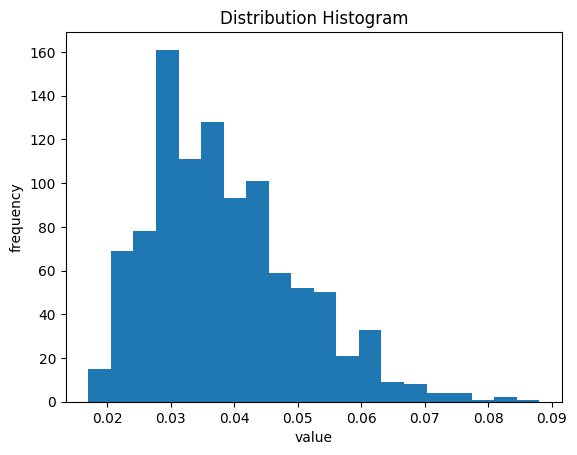

In [3]:
mcrv.plot()

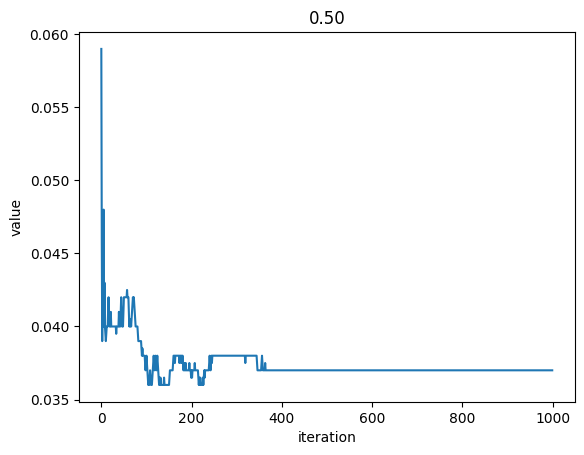

In [4]:
mcrv.plot_statistic('0.50')

In [ ]:
mcrv.theoretical_quartiles(True)

In [ ]:
mcrv.simulated_quartiles(True)